# Binary Search Trees

- Recursive `add()` method
- Recursive `height()` method

In [1]:
from graphviz import Graph, Digraph
import random
import math

## Binary Search Tree

- special case of *Binary trees*
- **BST rule**: any node's value is bigger than every value in its left subtree, and and smaller than every value in its right subtree
- TODO: write a method to insert values to a BST, while preserving the BST rule

In [2]:
class BSTNode:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # Category 2: functions that do some action
    def dump(self, prefix="", suffix=""):
        """
        prints out name of every node in the tree with some basic formatting
        """
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        print(prefix, self.label, suffix)
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # Category 1: functions that return some computation
    def search(self, target):
        """
        returns True/False, if target is somewhere in the tree
        """
        if target == self.label:
            return True
        elif target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True
        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
        return False
    
    def add(self, label):
        """
        Finds the correct spot for label and adds a new node with it.
        Assumes that tree already contains at least one node -> TODO: discuss why?
        Raises ValueError if label is already on the tree.
        """
        if label < self.label:
            # go left
            if self.left == None:
                self.left = BSTNode(label)
            else:
                # recurse left
                self.left.add(label)
        elif label > self.label:
            # go right
            if self.right == None:
                self.right = BSTNode(label)
            else:
                # recurse right
                self.right.add(label)
        else:
            raise ValueError(f"{label} is already a node on the tree!")

### Code folding nbextension

- Installation steps on terminal: 
    - `pip3 install jupyter_contrib_nbextensions`
    - `jupyter contrib nbextension install --user`
    - `jupyter nbextension enable codefolding/main`

- Go to "jupyterlab" > "Settings" > "Advanced Settings Editor" > "Notebook" > "Rulers" > enable "Code Folding" (there should be three such settings).


### Recursive `add` method
- Manually creating a tree is cumbersome and subject to mistakes (violations of BST rule)

In [3]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.right = BSTNode(8)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
root.dump("", "(ROOT)")

		 1 (LEFT)
	 2 (LEFT)
			 3 (LEFT)
		 4 (RIGHT)
			 8 (RIGHT)
 10 (ROOT)
		 12 (LEFT)
	 15 (RIGHT)
		 19 (RIGHT)


In [4]:
values = [10, 2, 1, 4, 8, 3, 15, 12, 19]

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
root.dump("", "(ROOT)")

		 1 (LEFT)
	 2 (LEFT)
			 3 (LEFT)
		 4 (RIGHT)
			 8 (RIGHT)
 10 (ROOT)
		 12 (LEFT)
	 15 (RIGHT)
		 19 (RIGHT)


### Recursive `height` method

- **Height**: the number of edges on the longest root-to-leaf path
- left subtree has height 4, right subtree has height 6, my height = 7
- left subtree has height 4, right subtree has height 4, my height = 5
- left subtree has height 10, right subtree has height 0, my height = 11
- left subtree has height of l, right subtree has height of r, my height = max(l, r) + 1
- What is the simplest case for height calculation? An empty tree (no nodes at all)

In [5]:
def height(node):
    """
    Calculates height of the BST.
    Height: the number of edges on the longest root-to-leaf path
    """
    if node == None: 
        return -1 
    
    left_height = height(node.left)
    right_height = height(node.right)
    
    return max(left_height, right_height) + 1

In [6]:
# TODO: Let's implement and invoke the height method
height(root)

3

### Tree containing 100 values
- let's use range(...) to produce a sequence of 100 integers
- recall that range(...) returns a sequence in increasing order
- what will be the height of this tree? **99**

In [7]:
values = list(range(100))
# Q: Is this tree balanced?
# A: No, it is the worst possible BST for these numbers, that is
#    it is a linked list!

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
print(height(root))
# root.dump("", "(ROOT)")

99


#### Let's use `random` module `shuffle` function to randomly order the sequence of 100 numbers.
- in-place re-ordering of numbers (just like `sort` method)

In [8]:
values = list(range(100))
random.shuffle(values)
# Q: Is this tree balanced?
# A: depends on the shuffling, you can check using math.log2(N)

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
print(height(root))
# root.dump("", "(ROOT)")

12


In [9]:
math.log2(100)

6.643856189774724

### Balanced BSTs / Self-balancing BSTs
- not a covered topic for the purpose of this course
- you are **not required** to know how to do this
- you can explore the below recursive function definition if you are interested

In [10]:
# Recrusive function that
def sorted_array_to_bst(nums, bst_nums):
    """
    Produces best ordering nums (a list of sorted numbers),
    for the purpose of creating a balanced BST.
    Writes new ordering of numbers into bst_nums.
    """
    if len(nums) == 0:
        return None
    elif len(nums) == 1:
        bst_nums.append(nums[0])
    else:
        mid_index = len(nums)//2
        bst_nums.append(nums[mid_index])
        
        # recurse left
        left_val = sorted_array_to_bst(nums[:mid_index], bst_nums)
        if left_val != None:
            bst_nums.append(left_val)

        # recurse right
        right_val = sorted_array_to_bst(nums[mid_index+1:], bst_nums)
        if right_val != None:
            bst_nums.append(right_val)

In [11]:
bst_nums = []
sorted_array_to_bst(list(range(5)), bst_nums)
bst_nums

[2, 1, 0, 4, 3]

In [12]:
bst_nums = []
sorted_array_to_bst(list(range(100)), bst_nums)

root = BSTNode(bst_nums[0])
for val in bst_nums[1:]:
    root.add(val)

height(root)

6

In [13]:
bst_nums = []
sorted_array_to_bst(list(range(5)), bst_nums)

root = BSTNode(bst_nums[0])
for val in bst_nums[1:]:
    root.add(val)

height(root)
root.dump("", "(ROOT)")

		 0 (LEFT)
	 1 (LEFT)
 2 (ROOT)
		 3 (LEFT)
	 4 (RIGHT)


# More about General Graphs
### Depth First Search (DFS) 
- Last lecture: BST search with complexity **O(logN)**
- Finds a path from one node to another -- works on any directed graph

In [14]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

### For a regular graph, you need a new class `Graph` to keep track of the whole graph.
- Why? Recall the height function: you might not have a root!

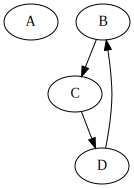

In [15]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        # to keep track which nodes have already been visited
        self.visited = set()

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        """
        Automatically adds missing nodes.
        """
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        """
        Draws the graph nodes and edges iteratively.
        """
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search(self, source, destination):
        """
        Clears the visited set and invokes dfs_search
        for the root node.
        """
        self.visited.clear()
        return self.nodes[source].dfs_search(self.nodes[destination])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        
    def __repr__(self):
        return self.name
    
    def dfs_search(self, dst):
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return False
        self.graph.visited.add(self)

        if self == dst:
            return True
        for child in self.children:
            if child.dfs_search(dst):
                return True
        return False

g = example(1)
g

### Testcases for DFS

In [16]:
print(g.dfs_search("B", "A")) # should return False
print(g.dfs_search("B", "D")) # should return True

False
True


In [17]:
# DFS search
# TODO: give the actual path, not just True/False
# TODO: use a different algorithm to find the shortest path